<h1>SPH6004 Self Assignment 1</h1>
<h2>Presented by GUO YUTONG(A0274654W)</h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
data = pd.read_csv("../data/processed/data_dropped_columns.csv", header=0)

See all the values of the two text value columns

In [3]:
print(data["gender"].groupby(data["gender"]).size(), "\n")
print(data["race"].groupby(data["race"]).size())

gender
F    22480
M    28440
Name: gender, dtype: int64 

race
AMERICAN INDIAN/ALASKA NATIVE                   87
ASIAN                                          614
ASIAN - ASIAN INDIAN                           121
ASIAN - CHINESE                                547
ASIAN - KOREAN                                  46
ASIAN - SOUTH EAST ASIAN                       168
BLACK/AFRICAN                                  194
BLACK/AFRICAN AMERICAN                        3845
BLACK/CAPE VERDEAN                             319
BLACK/CARIBBEAN ISLAND                         282
HISPANIC OR LATINO                             501
HISPANIC/LATINO - CENTRAL AMERICAN              28
HISPANIC/LATINO - COLUMBIAN                     39
HISPANIC/LATINO - CUBAN                         40
HISPANIC/LATINO - DOMINICAN                    337
HISPANIC/LATINO - GUATEMALAN                   101
HISPANIC/LATINO - HONDURAN                      33
HISPANIC/LATINO - MEXICAN                       52
HISPANIC/LATINO - P

Change **gender** to one-hot encoding

In [4]:
data["male"] = data["gender"].apply(lambda x: 1 if x == "M" else 0)
data["female"] = data["gender"].apply(lambda x: 0 if x == "M" else 1)
data = data.drop("gender", axis=1)

As it can be seen, **race** has coverage between values(e.g. *ASIAN* is the super-class of *ASIAN - CHINESE*).
It is hard to say why the specificity levels are different, perhaps because of the discrepancy of recording criteria. Anyway, they need to be unified at granularity by upgrading the sub-classes to super-classes. Also, some races have very few samples comparing to other main categories, they are put into *OTHER*.
<ul>
    <li>
        ASIAN
        <ul>
            <li>ASIAN</li>
            <li>ASIAN - ASIAN INDIAN</li>
            <li>ASIAN - CHINESE</li>
            <li>ASIAN - KOREAN</li>
            <li>ASIAN - SOUTH EAST ASIAN</li>
        </ul>
    </li>
    <li>
        BLACK
        <ul>
            <li>BLACK</li>
            <li>BLACK/AFRICAN</li>
            <li>BLACK/AFRICAN AMERICAN</li>
            <li>BLACK/CAPE VERDEAN</li>
            <li>BLACK/CARIBBEAN ISLAND</li>
        </ul>
    </li>
    <li>
        HISPANIC/LATINO
        <ul>
            <li>HISPANIC OR LATINO</li>
            <li>HISPANIC/LATINO - CENTRAL AMERICAN</li>
            <li>HISPANIC/LATINO - COLUMBIAN</li>
            <li>HISPANIC/LATINO - CUBAN</li>
            <li>HISPANIC/LATINO - DOMINICAN</li>
            <li>HISPANIC/LATINO - GUATEMALAN</li>
            <li>HISPANIC/LATINO - HONDURAN</li>
            <li>HISPANIC/LATINO - MEXICAN</li>
            <li>HISPANIC/LATINO - PUERTO RICAN</li>
            <li>HISPANIC/LATINO - SALVADORAN</li>
            <li>SOUTH AMERICAN</li>
        </ul>
    </li>
    <li>
        WHITE
        <ul>
            <li>WHITE</li>
            <li>WHITE - BRAZILIAN</li>
            <li>WHITE - EASTERN EUROPEAN</li>
            <li>WHITE - OTHER EUROPEAN</li>
            <li>WHITE - RUSSIAN</li>
            <li>PORTUGUESE</li>
        </ul>
    </li>
    <li>
        UNKNOWN
        <ul>
            <li>UNKNOWN</li>
            <li>PATIENT DECLINED TO ANSWER</li>
            <li>UNABLE TO OBTAIN</li>
        </ul>
    </li>
    <li>
        OTHER
        <ul>
            <li>OTHER</li>
            <li>AMERICAN INDIAN/ALASKA NATIVE</li>
            <li>MULTIPLE RACE/ETHNICITY</li>
            <li>NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER</li>
    </li>
</ul>

In [5]:
def map_race(original_race):
    race_map = {
        "ASIAN": "ASIAN",
        "ASIAN - ASIAN INDIAN": "ASIAN",
        "ASIAN - CHINESE": "ASIAN",
        "ASIAN - KOREAN": "ASIAN",
        "ASIAN - SOUTH EAST ASIAN": "ASIAN",

        "BLACK": "BLACK",
        "BLACK/AFRICAN": "BLACK",
        "BLACK/AFRICAN AMERICAN": "BLACK",
        "BLACK/CAPE VERDEAN": "BLACK",
        "BLACK/CARIBBEAN ISLAND": "BLACK",

        "HISPANIC OR LATINO": "HISPANIC/LATINO",
        "HISPANIC/LATINO - CENTRAL AMERICAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - COLUMBIAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - CUBAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - DOMINICAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - GUATEMALAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - HONDURAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - MEXICAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC/LATINO",
        "HISPANIC/LATINO - SALVADORAN": "HISPANIC/LATINO",
        "SOUTH AMERICAN": "HISPANIC/LATINO",

        "WHITE": "WHITE",
        "WHITE - BRAZILIAN": "WHITE",
        "WHITE - EASTERN EUROPEAN": "WHITE",
        "WHITE - OTHER EUROPEAN": "WHITE",
        "WHITE - RUSSIAN": "WHITE",
        "PORTUGUESE": "WHITE",

        "UNKNOWN": "UNKNOWN",
        "PATIENT DECLINED TO ANSWER": "UNKNOWN",
        "UNABLE TO OBTAIN": "UNKNOWN",

        "OTHER": "OTHER",
        "AMERICAN INDIAN/ALASKA NATIVE": "OTHER",
        "MULTIPLE RACE/ETHNICITY": "OTHER",
        "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER": "OTHER"
    }
    return race_map[original_race]


In [6]:
data["race"] = data["race"].apply(map_race)

In [7]:
print(data["race"].groupby(data["race"]).size())

race
ASIAN               1496
BLACK               4640
HISPANIC/LATINO     1781
OTHER               1962
UNKNOWN             6676
WHITE              34365
Name: race, dtype: int64


Convert **race** to one-hot encoding

In [8]:
data["asian"] = data["race"].apply(lambda x: 1 if x=="ASIAN" else 0)
data["black"] = data["race"].apply(lambda x: 1 if x=="BLACK" else 0)
data["hispanic/latino"] = data["race"].apply(lambda x: 1 if x=="HISPANIC/LATINO" else 0)
data["other"] = data["race"].apply(lambda x: 1 if x=="OTHER" else 0)
data["white"] = data["race"].apply(lambda x: 1 if x=="WHITE" else 0)
data = data.drop("race", axis=1)

See the distribution of null values in row

In [9]:
data["null_count"] = data.isnull().sum(axis=1)
print(data["null_count"].describe())

count    50920.000000
mean         9.125432
std          8.537645
min          0.000000
25%          0.000000
50%         10.000000
75%         12.000000
max         66.000000
Name: null_count, dtype: float64


Drop those rows with equal or more than 30 null values

In [10]:
data = data[data["null_count"] < 20].reset_index(drop=True)
data = data.drop("null_count", axis=1)

In [11]:
column_with_null = data.columns[data.isna().any()].tolist()
numericals = ["admission_age", "heart_rate_min", "heart_rate_max"] + column_with_null
data[numericals].describe()

,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,po2_min,po2_max,pco2_min,pco2_max,baseexcess_min,baseexcess_max,totalco2_min,totalco2_max,hematocrit_min.1,hematocrit_max.1,hemoglobin_min.1,hemoglobin_max.1,platelets_min,platelets_max,wbc_min,wbc_max,aniongap_min,aniongap_max,bicarbonate_min.1,bicarbonate_max.1,bun_min,bun_max,calcium_min.1,calcium_max.1,chloride_min.1,chloride_max.1,glucose_min.2,glucose_max.2,sodium_min.1,sodium_max.1,potassium_min.1,potassium_max.1,abs_basophils_min,abs_basophils_max,abs_eosinophils_min,abs_eosinophils_max,abs_lymphocytes_min,abs_lymphocytes_max,abs_monocytes_min,abs_monocytes_max,abs_neutrophils_min,abs_neutrophils_max,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,weight_admit
count,41898.000000,41898.000000,41898.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41890.000000,41890.000000,41890.000000,41870.000000,41870.000000,41870.000000,40425.000000,40425.000000,40425.000000,41873.000000,41873.000000,41873.000000,41301.000000,41301.000000,41301.000000,30877.000000,30877.000000,30882.000000,30882.000000,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000,41893.000000,41893.000000,41882.000000,41882.000000,41885.000000,41885.000000,41890.000000,41890.000000,41848.000000,41848.000000,41887.000000,41887.000000,41890.000000,41890.000000,37961.000000,37961.000000,41890.000000,41890.000000,41723.000000,41723.000000,41887.000000,41887.000000,41863.000000,41863.000000,30668.000000,30668.000000,30669.000000,30669.000000,30679.000000,30679.000000,30668.000000,30668.000000,30668.000000,30668.000000,38884.000000,38884.000000,38886.000000,38886.000000,38683.000000,38683.000000,41818.000000,41445.000000,41574.000000,41687.000000,41080.000000
mean,65.115936,70.449764,103.409036,91.930541,148.138695,118.243555,46.705928,87.868235,63.283111,59.282148,105.438366,78.480524,12.334237,27.847671,19.155041,36.276276,37.370817,36.831909,91.691663,99.477085,96.879400,133.709124,882.965802,272.783683,7.315903,7.413527,93.499385,229.651739,36.746025,47.504388,-3.183543,0.450504,22.879635,26.556912,30.791211,35.495264,10.251373,11.717972,186.691632,226.560463,10.497881,14.568823,12.971468,16.401214,21.560448,24.379612,22.528121,27.075937,8.124836,8.615735,102.056226,106.125973,119.223738,168.334660,136.809965,139.836799,3.917795,4.578821,0.031503,0.037499,0.099074,0.117225,1.599319,1.777156,0.587536,0.674367,9.520772,10.264831,1.314549,1.557410,14.443072,16.944065,30.936773,42.545056,13.609379,5.031198,3.159042,3.028162,81.896071
std,17.157817,15.235164,20.407532,17.312569,22.763940,16.028243,11.525194,19.688493,11.131154,13.701078,25.527141,10.961833,3.627601,6.439372,3.801818,0.749578,0.741791,0.553219,6.743609,1.361052,2.464507,4920.216117,26484.695663,7213.258164,0.107675,0.074747,69.319553,152.548197,9.153033,13.616293,6.175325,4.982530,5.593227,5.191851,6.687647,6.209083,2.274049,2.150515,98.850476,111.199850,8.365993,12.323082,3.601854,5.092782,4.714725,4.148747,19.046396,22.255995,0.865669,0.959113,6.315339,6.202466,41.191772,104.117798,5.089298,4.823491,0.570063,0.837945,0.052368,0.070823,0.257567,0.308085,5.931387,7.239136,0.845915,1.238378,6.314784,6.927614,0.585656,1.096923,5.889880,10.926047,11.487312,29.320611,2.795397,1.771436,2.164791,1.147966,37.947818
min,18.002527,1.000000,36.000000,0.108000,34.000000,32.000000,1.000000,20.000000,19.500000,1.000000,26.000000,24.500000,1.000000,6.000000,6.000000,15.000000,26.670000,26.670000,1.000000,42.000000,41.384615,0.120000,34.000000,34.000000,6.410000,6.490000,0.000000,6.000000,0.000000,8.000000,-414.000000,-414.000000,1.000000,1.000000,4.300000,12.500000,1.300000,3.500000,5.000000,5.000000,0.100000,0.100000,-9.000000,3.000

In [12]:
print(len(numericals))

79


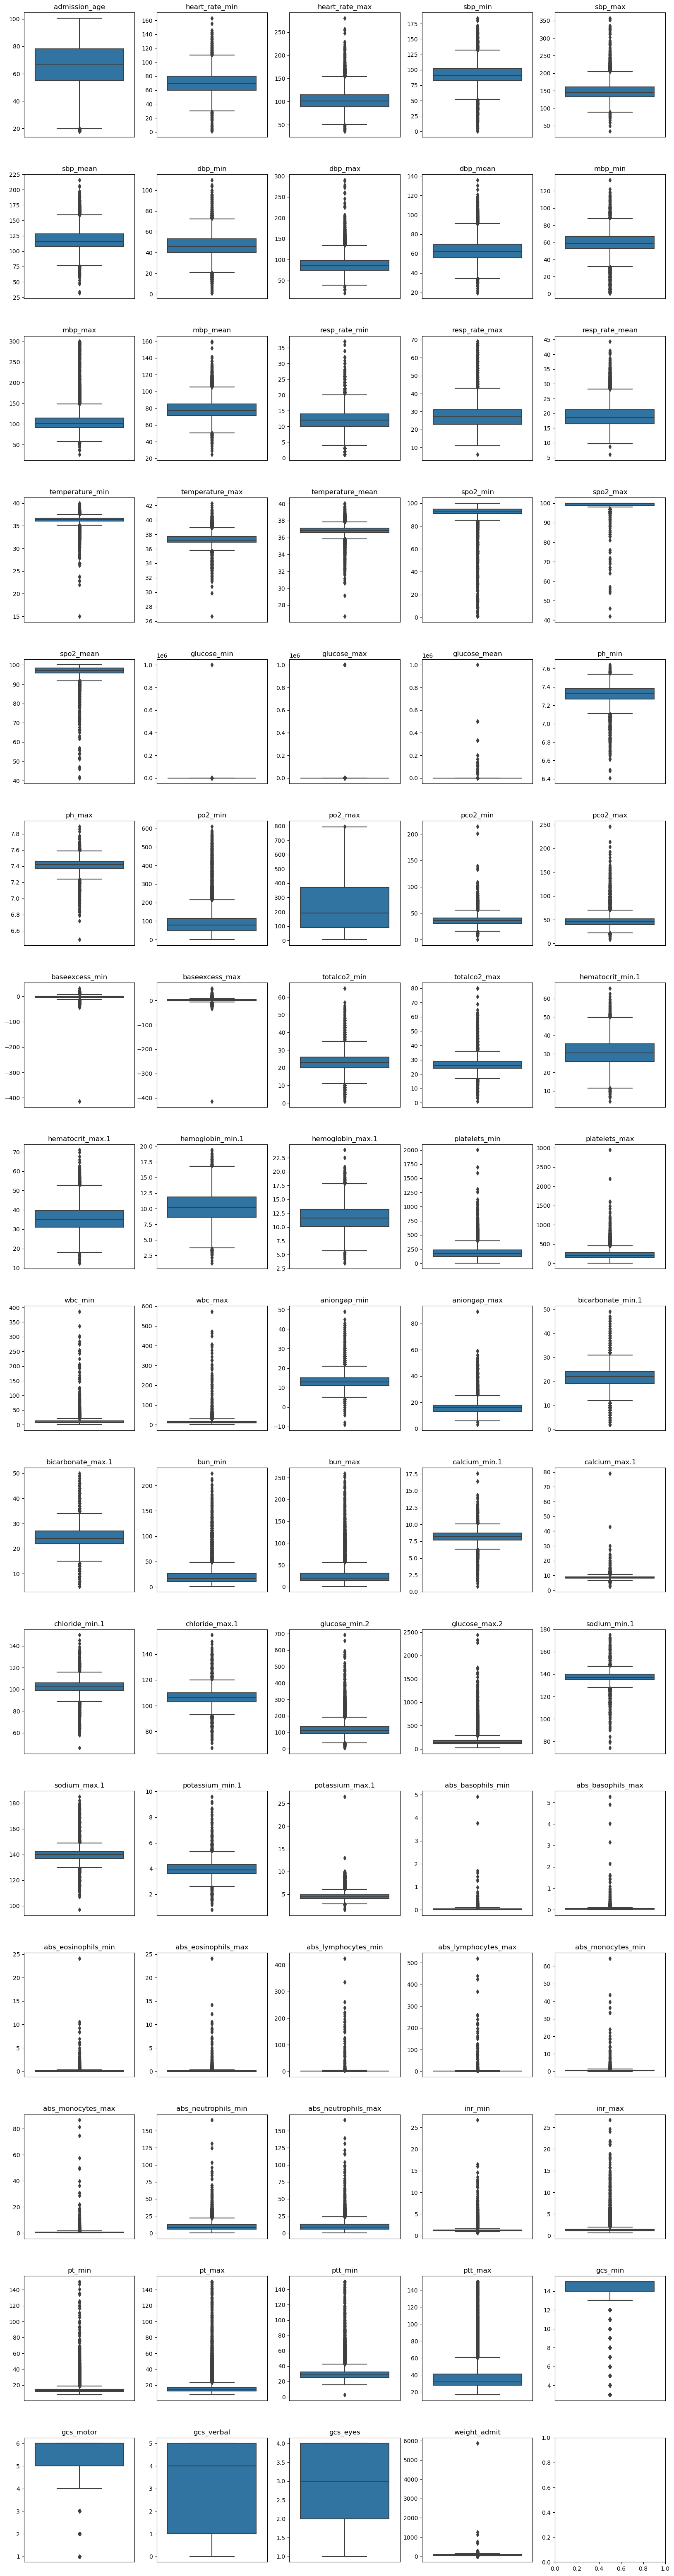

In [13]:
fig, axs = plt.subplots(16, 5, figsize=(20,80))
plt.subplots_adjust(hspace=0.3)
for i in range(len(numericals)):
    
    row_loc = i // 5
    col_loc = i % 5
    
    sns.boxplot(data=data[numericals[i]], ax=axs[row_loc, col_loc])
    # axs[row_loc, col_loc].boxplot(x=data[column_with_null[i]])
    axs[row_loc, col_loc].set_title(numericals[i])
    axs[row_loc, col_loc].set_xticks([])

plt.show()

According to the graph, some columns have values that are obviously unreasonable, so the corresponding records should be dropped.
One thing needs to be emphasized that I am not filtering outliers based on standard deviation since this is a dataset of disease which contains many abnormalty. The data points that are removed are those that are ridiculously far from the cluster, and the values don't look right(e.g. "99999", weight over the heaviest human world record 675kg).
<ul>
    <li>glucose_min</li>
    <li>glucose_max</li>
    <li>glucose_mean</li>
    <li>baseexcess_min</li>
    <li>baseexcess_max</li>
    <li>weight_admit</li>
</ul>

In [14]:
data_dropped_outliers = data.copy(deep=True)
data_dropped_outliers = data_dropped_outliers[((data_dropped_outliers["glucose_min"] < 20000) | data_dropped_outliers["glucose_min"].isnull()) & 
                                            ((data_dropped_outliers["glucose_max"] < 20000)| data_dropped_outliers["glucose_max"].isnull()) & 
                                            ((data_dropped_outliers["glucose_mean"] < 80000)| data_dropped_outliers["glucose_mean"].isnull())].reset_index(drop=True)
data_dropped_outliers = data_dropped_outliers[((data_dropped_outliers["baseexcess_min"] > -300) | data_dropped_outliers["baseexcess_min"].isna()) & 
                                            ((data_dropped_outliers["baseexcess_max"] > -300) | data_dropped_outliers["baseexcess_max"].isna())].reset_index(drop=True)
data_dropped_outliers = data_dropped_outliers[(data_dropped_outliers["weight_admit"] < 700) | data_dropped_outliers["weight_admit"].isnull()].reset_index(drop=True)

View the distribution again

In [15]:
data_dropped_outliers[column_with_null].describe()

,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,po2_min,po2_max,pco2_min,pco2_max,baseexcess_min,baseexcess_max,totalco2_min,totalco2_max,hematocrit_min.1,hematocrit_max.1,hemoglobin_min.1,hemoglobin_max.1,platelets_min,platelets_max,wbc_min,wbc_max,aniongap_min,aniongap_max,bicarbonate_min.1,bicarbonate_max.1,bun_min,bun_max,calcium_min.1,calcium_max.1,chloride_min.1,chloride_max.1,glucose_min.2,glucose_max.2,sodium_min.1,sodium_max.1,potassium_min.1,potassium_max.1,abs_basophils_min,abs_basophils_max,abs_eosinophils_min,abs_eosinophils_max,abs_lymphocytes_min,abs_lymphocytes_max,abs_monocytes_min,abs_monocytes_max,abs_neutrophils_min,abs_neutrophils_max,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,weight_admit
count,41859.000000,41859.000000,41859.000000,41859.000000,41859.000000,41859.000000,41855.000000,41855.000000,41855.000000,41835.000000,41835.000000,41835.000000,40391.000000,40391.000000,40391.000000,41838.000000,41838.000000,41838.000000,41266.000000,41266.000000,41266.000000,30849.000000,30849.000000,30853.000000,30853.000000,30852.000000,30852.000000,30852.000000,30852.000000,30852.000000,30852.000000,41858.000000,41858.000000,41847.000000,41847.000000,41850.000000,41850.000000,41855.000000,41855.000000,41813.000000,41813.000000,41852.000000,41852.000000,41855.000000,41855.000000,37928.000000,37928.000000,41855.000000,41855.000000,41688.000000,41688.000000,41852.000000,41852.000000,41828.000000,41828.000000,30638.000000,30638.000000,30639.000000,30639.000000,30649.000000,30649.000000,30638.000000,30638.000000,30638.000000,30638.000000,38851.000000,38851.000000,38853.000000,38853.00000,38649.000000,38649.000000,41783.000000,41412.000000,41539.000000,41652.000000,41045.000000
mean,91.935799,148.144151,118.248732,46.708012,87.869869,63.285071,59.285179,105.437674,78.483119,12.333393,27.846289,19.154092,36.276251,37.370866,36.831908,91.694656,99.477007,96.879976,109.506507,180.935143,140.612287,7.315917,7.413509,93.500989,229.647328,36.751297,47.511377,-3.167704,0.464800,22.882763,26.559931,30.791987,35.495012,10.251605,11.717908,186.739761,226.605568,10.499074,14.570080,12.970559,16.398776,21.562637,24.380981,22.525791,27.071437,8.124924,8.615790,102.057587,106.126198,119.228099,168.293850,136.811789,139.837475,3.917989,4.578844,0.031508,0.037504,0.099069,0.117223,1.599629,1.777497,0.587587,0.674354,9.521763,10.265881,1.314095,1.556293,14.438445,16.93253,30.935799,42.540780,13.609434,5.031247,3.159031,3.028186,81.672818
std,17.311127,22.765361,16.028166,11.526833,19.690536,11.131030,13.701750,25.517137,10.961248,3.627137,6.439463,3.801334,0.749683,0.741955,0.553378,6.724783,1.361262,2.461902,37.236582,90.951009,47.446427,0.107597,0.074743,69.330511,152.547357,9.153641,13.617852,5.711718,4.388771,5.590678,5.189746,6.687475,6.207339,2.274064,2.150321,98.850959,111.207504,8.368651,12.327007,3.600987,5.089218,4.712992,4.147940,19.042948,22.249697,0.865626,0.959235,6.313475,6.201421,41.158682,103.885944,5.088480,4.823026,0.570011,0.837985,0.052389,0.070851,0.257663,0.308208,5.934255,7.242648,0.846254,1.238851,6.316416,6.929345,0.584752,1.094093,5.879964,10.89516,11.489740,29.319237,2.795280,1.771453,2.164786,1.148009,23.360792
min,0.108000,34.000000,32.000000,1.000000,20.000000,19.500000,1.000000,26.000000,24.500000,1.000000,6.000000,6.000000,15.000000,26.670000,26.670000,1.000000,42.000000,41.384615,0.120000,34.000000,34.000000,6.410000,6.490000,0.000000,6.000000,0.000000,8.000000,-44.000000,-33.000000,1.000000,3.000000,4.300000,12.500000,1.300000,3.500000,5.000000,5.000000,0.100000,0.100000,-9.000000,3.000000,2.000000,5.000000,1.000000,1.000000,0.800000,2.600000,46.000000,67.000000,5.000000,19.000000,74.000000,97.000000,0.800000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

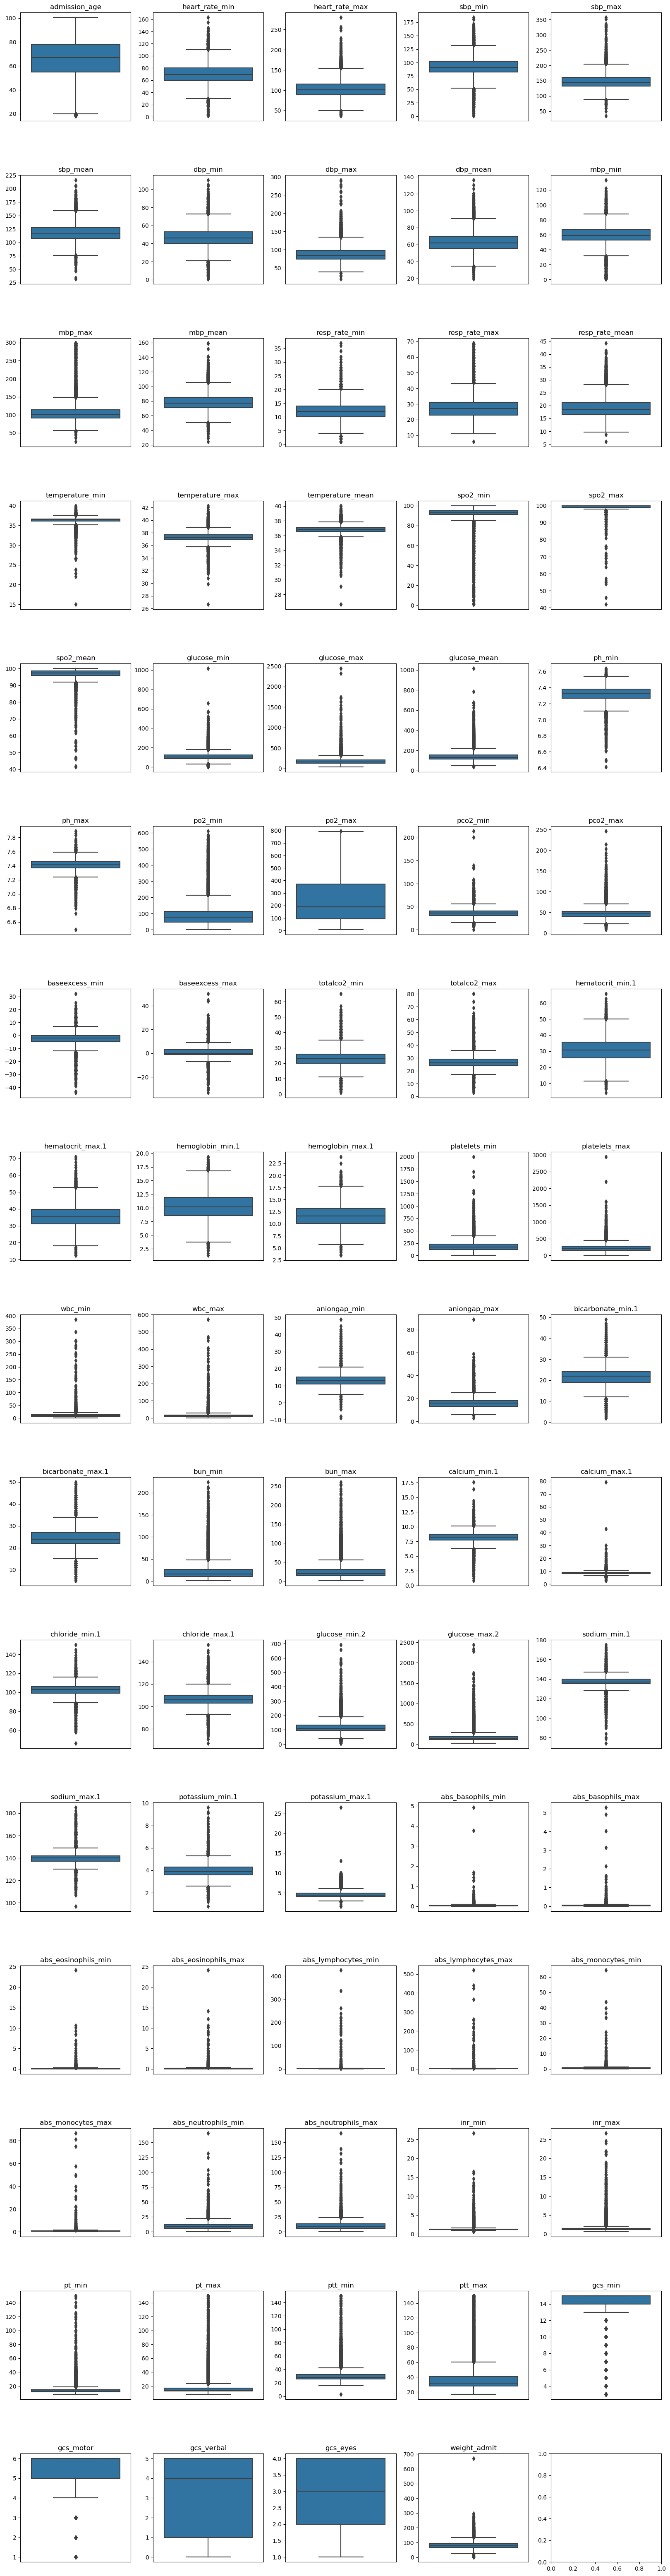

In [16]:
fig, axs = plt.subplots(16, 5, figsize=(20,80))
plt.subplots_adjust(hspace=0.5)
for i in range(len(numericals)):
    
    row_loc = i // 5
    col_loc = i % 5
    
    sns.boxplot(data=data_dropped_outliers[numericals[i]], ax=axs[row_loc, col_loc])
    # axs[row_loc, col_loc].boxplot(x=data[column_with_null[i]])
    axs[row_loc, col_loc].set_title(numericals[i])
    axs[row_loc, col_loc].set_xticks([])

plt.show()

Since most of the features have many statistical outliers, it will be better to fill the null values with **median** as it has good effect of outlier resistance.

In [17]:
data_filled_na = data_dropped_outliers.fillna(data_dropped_outliers.median(axis=0))

Now see the correlations after removing outliers and filling Null values.

In [18]:
data_filled_na.corr()

,aki,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,po2_min,po2_max,pco2_min,pco2_max,baseexcess_min,baseexcess_max,totalco2_min,totalco2_max,hematocrit_min.1,hematocrit_max.1,hemoglobin_min.1,hemoglobin_max.1,platelets_min,platelets_max,wbc_min,wbc_max,aniongap_min,aniongap_max,bicarbonate_min.1,bicarbonate_max.1,bun_min,bun_max,calcium_min.1,calcium_max.1,chloride_min.1,chloride_max.1,glucose_min.2,glucose_max.2,sodium_min.1,sodium_max.1,potassium_min.1,potassium_max.1,abs_basophils_min,abs_basophils_max,abs_eosinophils_min,abs_eosinophils_max,abs_lymphocytes_min,abs_lymphocytes_max,abs_monocytes_min,abs_monocytes_max,abs_neutrophils_min,abs_neutrophils_max,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,weight_admit,male,female,asian,black,hispanic/latino,other,white
aki,1.000000,0.166395,0.046022,0.087500,0.069357,-0.179959,0.054617,-0.086047,-0.180140,0.001425,-0.138701,-0.175611,0.056578,-0.110025,0.030321,0.107884,0.126269,-0.070222,0.065349,-0.003427,-0.090995,0.056509,-0.011391,0.009764,0.112599,0.098381,-0.124350,-0.010697,-0.089259,-0.011474,-0.029707,0.088612,-0.106298,0.000912,-0.067475,0.020066,-0.106502,-0.060339,-0.133966,-0.093048,-0.066961,-0.026350,0.045884,0.069175,0.113273,0.138260,-0.105068,-0.042185,0.223014,0.225578,-0.101330,-0.003367,-0.061192,-0.047592,0.036551,0.075764,-0.045105,-0.007803,0.069040,0.146568,-0.031869,-0.010522,-0.011762,-0.003316,-0.015000,-0.008851,0.024557,0.030853,0.074760,0.090471,0.108910,0.121613,0.112425,0.125993,0.089947,0.141932,-0.076049,-0.133339,-0.190929,-0.154527,0.198369,0.005934,-0.005934,-0.046020,0.003928,-0.028138,-0.014085,0.015153
admission_age,0.166395,1.000000,-0.183569,-0.169381,-0.199828,-0.111133,0.096333,0.010595,-0.305339,-0.065612,-0.322978,-0.196111,-0.007273,-0.212431,0.022315,0.006862,0.017412,-0.124125,-0.154574,-0.181441,-0.102771,-0.024163,-0.083354,0.059443,0.043834,0.069855,0.039218,0.048147,-0.042461,0.004961,0.024832,0.020958,0.062310,0.056003,0.058728,0.053152,-0.118068,-0.143917,-0.154967,-0.185378,-0.048413,-0.064678,0.028715,0.003733,0.033903,-0.041399,0.063967,0.028462,0.256803,0.224937,0.069096,0.012655,0.012520,-0.027983,0.073328,0.002665,0.035152,-0.001137,0.109746,0.060208,-0.019147,-0.024508,0.001585,-0.001006,0.011017,0.009322,0.023674,0.015136,0.012497,0.006277,0.079165,0.073549,0.079081,0.073417,0.069148,0.085912,-0.072954,-0.019696,-0.010567,-0.010462,-0.177537,-0.069976,0.069976,-0.014072,-0.069416,-0.096376,-0.042483,0.149364
heart_rate_min,0.046022,-0.183569,1.000000,0.598284,0.865531,0.012701,-0.101427,-0.067479,0.168159,0.077075,0.194430,0.089561,0.006830,0.090963,0.236195,0.236099,0.315579,0.142625,0.198372,0.214685,-0.029451,-0.084727,-0.097747,0.060618,0.053072,0.064887,-0.043434,-0.078553,-0.102226,-0.142295,0.006514,-0.009237,-0.072704,-0.065207,-0.050148,-0.047565,-0.047970,-0.034281,-0.056463,-0.043472,0.062099,0.083786,0.073200,0.070970,0.096876,0.140725,-0.101764,-0.058416,0.003701,0.019463,-0.136232,-0.083596,-0.090550,-0.055703,0.030873,0.080142,-0.077318,-0.046239,-0.029623,0.023213,-0.028168,0.002348,-0.019975,-0.006454,-0.013626,-0.008003,0.037610,0.050551,0.095427,0.107855,0.075818,0.055817,0.082869,0.061052,0.031461,0.016438,0.027550,0.047590,0.054748,0.069016,0.042149,-0.052621,0.052621,0.000143,0.047700,0.029151,0.004412,-0.029172
heart_rate_max,0.087500,-0.169381,0.598284,1.000000,0.836822,-0.143825,0.032123,-0.088897,0.057884,0.188062,0.193035,-0.042196,0.110567,0.090113,0.174945,0.316916,0.334372,0.066473,0.253450,0.196612,-0.143753,-0.026897,-0.104310,0.074760,0.076320,0.093739,-0.105821,-0.072117,-0.083787,-0.114121,-0.029052,0.026336,-0.129777,-0.075966,-0.093523,-0.053418,-0.025716,0.015584,-0.034652,0.002691,0.0

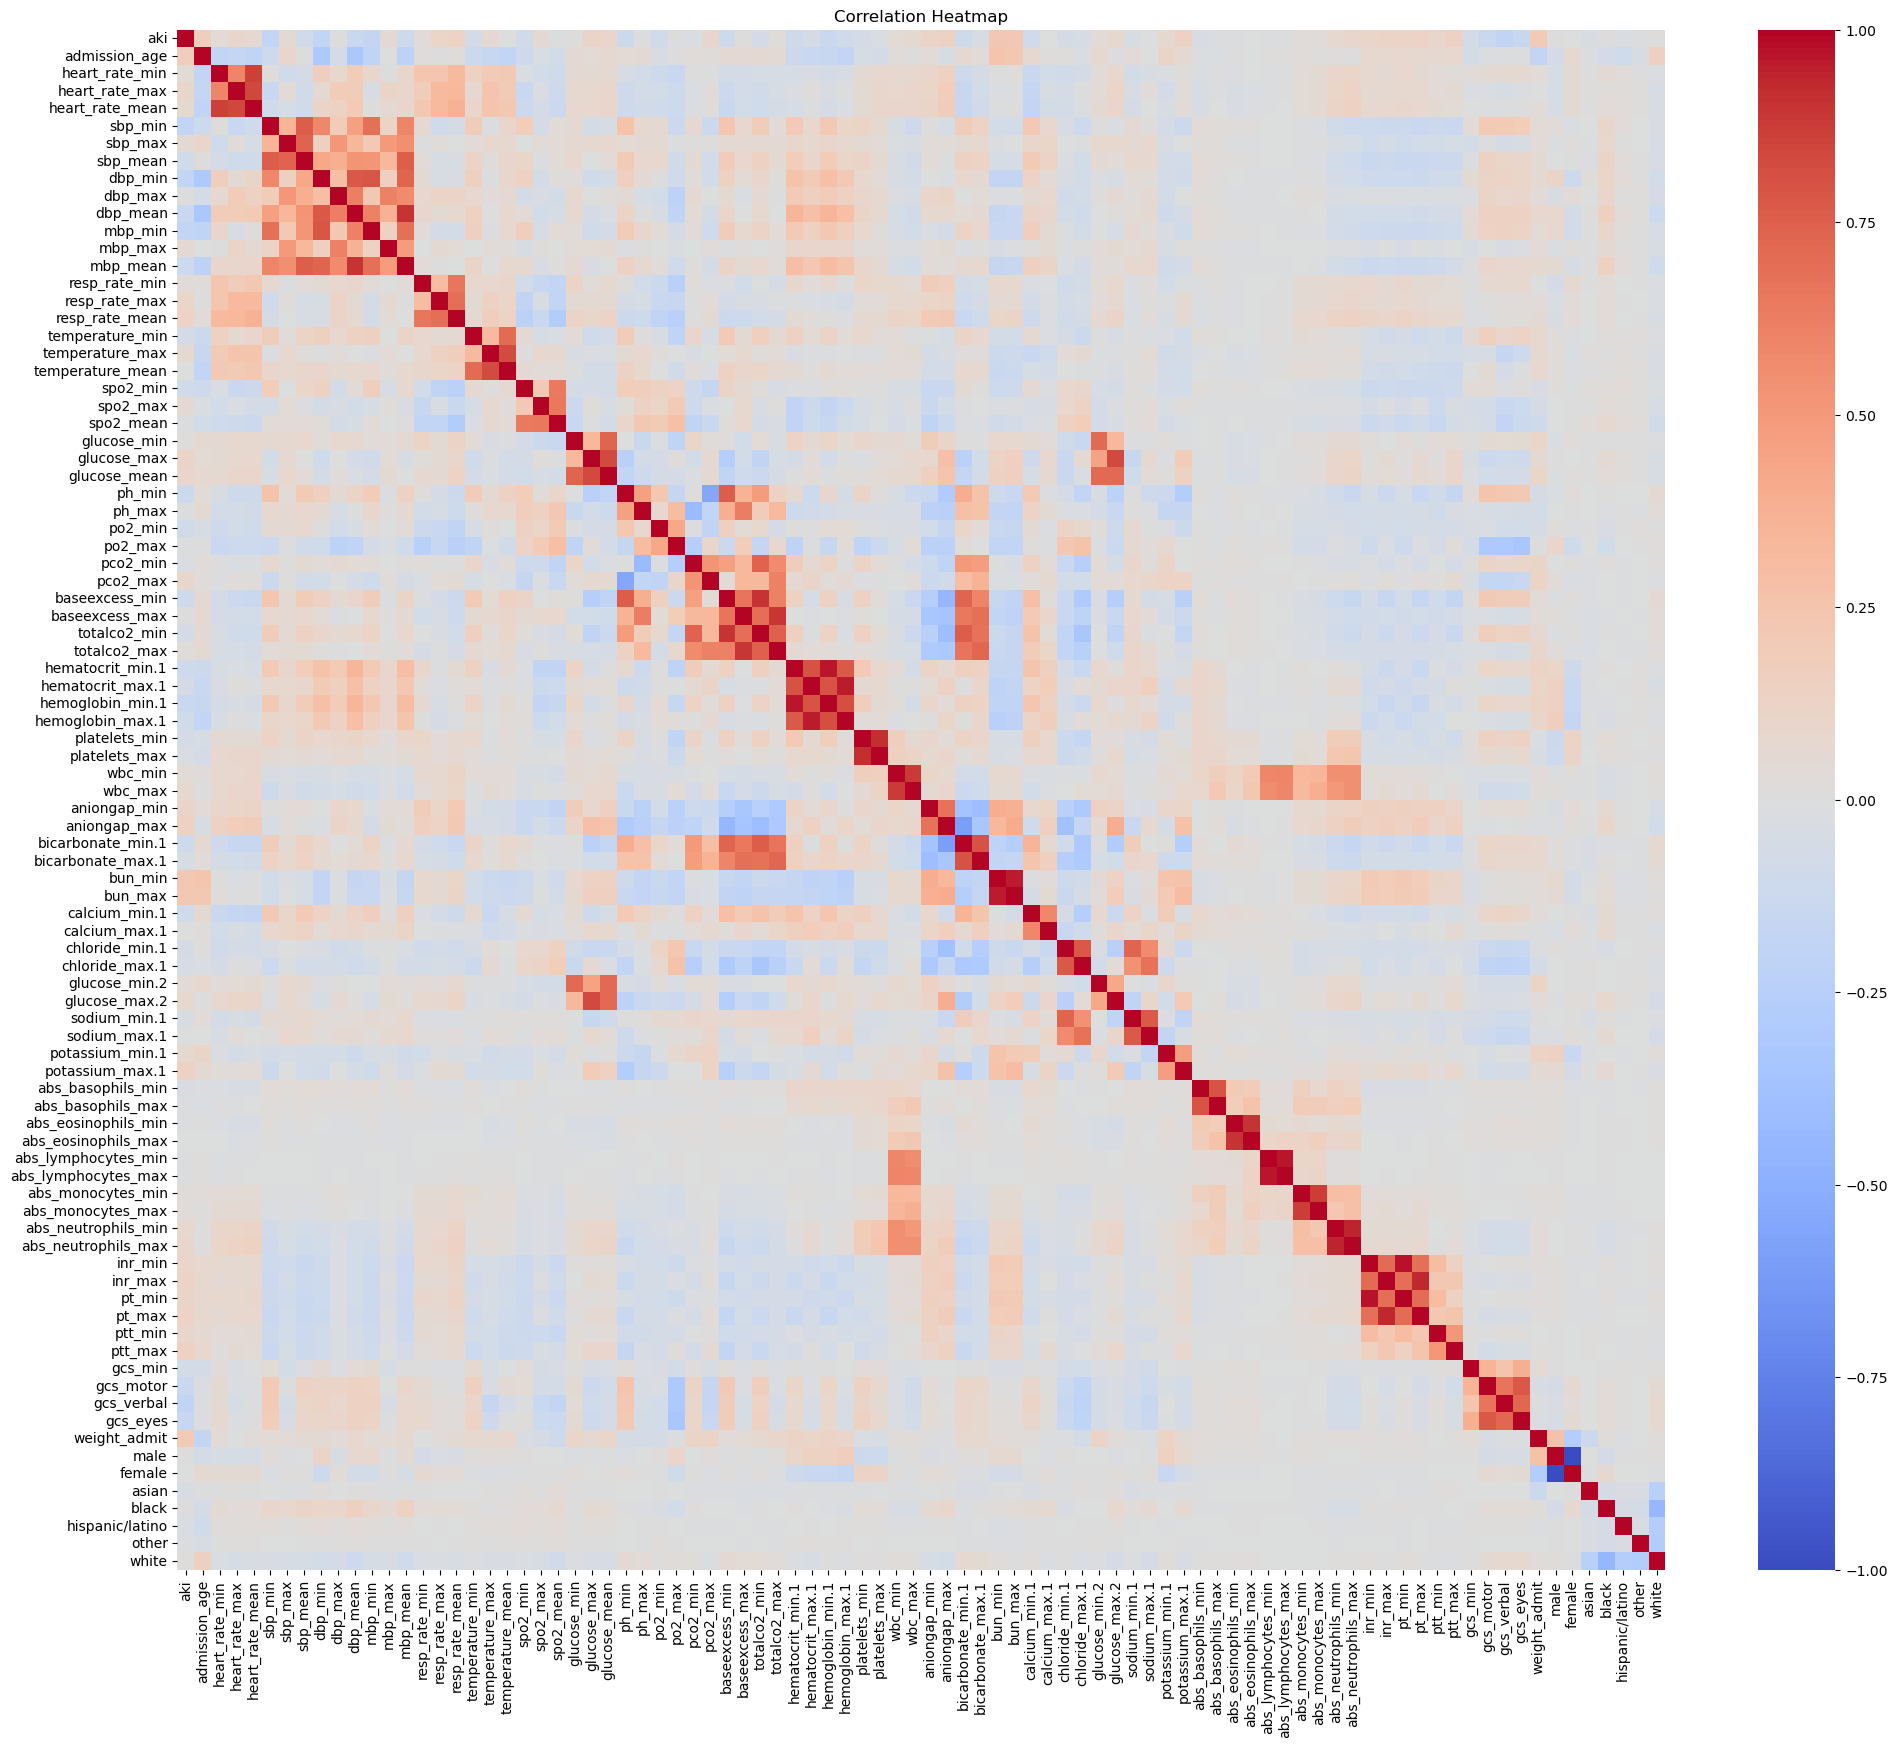

In [19]:
plt.figure(figsize=(24, 20))
sns.heatmap(data_filled_na.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Some newly emerged high correlations are found after removing outliers and filling null values, mainly happend between the *min* and *max* values of one same feature. To further reduce dimentions, now replace them by the *mean* value of *min* and *max*.
Influenced features:
<ul>
    <li>platelets_min - platelets_max (0.92)</li>
    <li>wbc_min - wbc_max (0.88)</li>
    <li>bicarbonate_min.1 - bicarbonate_max.1 (0.80)</li>
    <li>bun_min - bun_max (0.96)</li>
    <li>chloride_min.1 - chloride_max.1 (0.78)</li>
    <li>sodium_min.1 - sodium_max.1 (0.78)</li>
    <li>abs_basophils_min - abs_basophils_max (0.79)</li>
    <li>abs_eosinophils_min - abs_eosinophils_max (0.90)</li>
    <li>abs_lymphocytes_min - abs_lymphocytes_max (0.96)</li>
    <li>abs_monocytes_min - abs_monocytes_max (0.87)</li>
    <li>abs_neutrophils_min - abs_neutrophils_max (0.94)</li>
</ul>
There are also two groups of min-min and max-max pairing happen between:
<ul>
    <li>hematocrit_min.1 - hemoglobin_min.1 (0.97)</li>
    <li>hematocrit_max.1 - hemoglobin_max.1 (0.96)</li>
    <li>inr_min - pt_min(0.97)</li>
    <li>inr_max - pt_max(0.94)</li>
</ul>
These two groups of pairing only retain one pair for each.

In [20]:
data_filtered_corr = data_filled_na.copy(deep=True)
data_filtered_corr["platelets_mean"] = data_filtered_corr[["platelets_min","platelets_max"]].mean(axis=1).round(3)
data_filtered_corr["wbc_mean"] = data_filtered_corr[["wbc_min","wbc_max"]].mean(axis=1).round(3)
data_filtered_corr["bicarbonate_mean"] = data_filtered_corr[["bicarbonate_min.1","bicarbonate_max.1"]].mean(axis=1).round(3)
data_filtered_corr["bun_mean"] = data_filtered_corr[["bun_min","bun_max"]].mean(axis=1).round(3)
data_filtered_corr["chloride_mean"] = data_filtered_corr[["chloride_min.1","chloride_max.1"]].mean(axis=1).round(3)
data_filtered_corr["sodium_mean"] = data_filtered_corr[["sodium_min.1","sodium_max.1"]].mean(axis=1).round(3)
data_filtered_corr["abs_basophils_mean"] = data_filtered_corr[["abs_basophils_min","abs_basophils_max"]].mean(axis=1).round(3)
data_filtered_corr["abs_eosinophils_mean"] = data_filtered_corr[["abs_eosinophils_min","abs_eosinophils_max"]].mean(axis=1).round(3)
data_filtered_corr["abs_lymphocytes_mean"] = data_filtered_corr[["abs_lymphocytes_min","abs_lymphocytes_max"]].mean(axis=1).round(3)
data_filtered_corr["abs_monocytes_mean"] = data_filtered_corr[["abs_monocytes_min","abs_monocytes_max"]].mean(axis=1).round(3)
data_filtered_corr["abs_neutrophils_mean"] = data_filtered_corr[["abs_neutrophils_min","abs_neutrophils_max"]].mean(axis=1).round(3)

data_filtered_corr = data_filtered_corr.drop(["platelets_min","platelets_max", "wbc_min","wbc_max", "bicarbonate_min.1","bicarbonate_max.1",
                                              "bun_min","bun_max", "chloride_min.1","chloride_max.1", "sodium_min.1","sodium_max.1",
                                              "abs_basophils_min","abs_basophils_max", "abs_eosinophils_min","abs_eosinophils_max",
                                              "abs_lymphocytes_min","abs_lymphocytes_max", "abs_monocytes_min","abs_monocytes_max",
                                              "abs_neutrophils_min","abs_neutrophils_max", "hemoglobin_min.1", "hemoglobin_max.1",
                                              "pt_min", "pt_max"], axis=1)

The last thing, binning the 4-levels *aki* categories into two boolean:
<ul>
    <li><b>1</b>: has aki, including level 1, 2 and 3</li>
    <li><b>0</b>: no aki</li>
</ul>

In [21]:
data_filtered_corr["aki"] = data_filtered_corr["aki"].map(lambda x: 0 if x==0 else 1)

In [22]:
new_numerical_columns = data_filtered_corr.columns.to_list()
columns_to_del = ['aki', 'male', 'female', 'asian','black','hispanic/latino', 'other', 'white']
for i in columns_to_del:
    new_numerical_columns.remove(i)

scaler = StandardScaler()
data_filtered_corr[new_numerical_columns] = scaler.fit_transform(data_filtered_corr[new_numerical_columns])

In [23]:
data_filtered_corr.to_csv("../data/processed/data_aft_feat_eng.csv", index=False)